In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model,Sequential
from keras.layers import *
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.math import l2_normalize
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from gensim.models import KeyedVectors
from keras import layers


In [ ]:
!wget -P download -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
word2vec = KeyedVectors.load_word2vec_format('download/GoogleNews-vectors-negative300.bin.gz', binary=True)

--2020-12-02 07:16:26--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.238.237
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.238.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘download/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  61.0MB/s    in 29s     

2020-12-02 07:16:55 (54.4 MB/s) - ‘download/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [ ]:
(xtrain,ytrain),(xtest,ytest)=imdb.load_data(num_words=5000) 

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
maxlen=500
vocab_size=5000
emb_dimension=300
xtrain=pad_sequences(xtrain,maxlen=maxlen,padding='post')
xtest=pad_sequences(xtest,maxlen=maxlen,padding='post')

In [ ]:
word_idx=imdb.get_word_index() #getting vocab from imdb data

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
embedding_matrix = np.zeros((vocab_size,emb_dimension))
for word, i in word_idx.items():
    if word in word2vec.vocab and i<vocab_size:
        embedding_matrix[i] = word2vec.word_vec(word)

In [ ]:
input=Input(shape=(maxlen,))
emb=Embedding(vocab_size,emb_dimension,weights=[embedding_matrix])(input)
x=Conv1D(256,kernel_size=5,activation='relu')(emb) #Conv2D 
x=Dropout(0.5)(x)
x=LSTM(128,kernel_regularizer=keras.regularizers.L2(l2=0.01))(x) #l2=0.001
x=Dense(80,activation='relu')(x)
x=Dense(1,activation='sigmoid')(x)
model=Model(inputs=input,outputs=x)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 500, 300)          1500000   
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 256)          384256    
_________________________________________________________________
dropout (Dropout)            (None, 496, 256)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               197120    
_________________________________________________________________
dense (Dense)                (None, 80)                10320     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

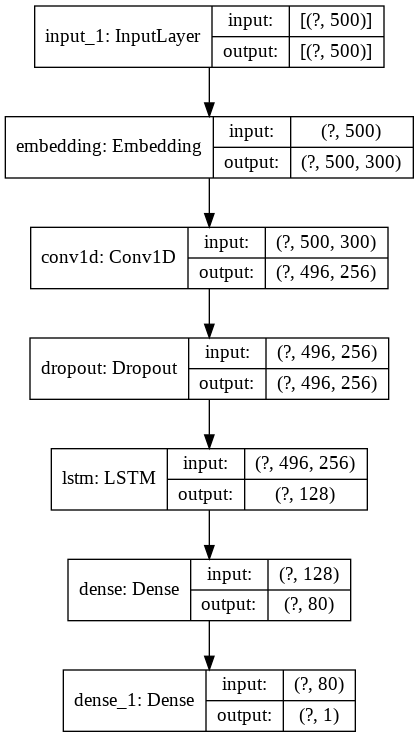

In [ ]:
plot_model(model, show_shapes=True, to_file='cnn_lstm.png')


In [ ]:
#opt=keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [ ]:
model.fit(xtrain,ytrain,batch_size=256,epochs=30,validation_data=(xtest,ytest))#,callbacks = [EarlyStopping(monitor='val_accuracy',patience=5)])

Epoch 1/30
98/98 [==============================] - 1166s 12s/step - loss: 1.5635 - accuracy: 0.5044 - val_loss: 0.7233 - val_accuracy: 0.5054
Epoch 2/30
98/98 [==============================] - 1177s 12s/step - loss: 0.6961 - accuracy: 0.5082 - val_loss: 0.6894 - val_accuracy: 0.5150
Epoch 3/30
98/98 [==============================] - 1170s 12s/step - loss: 0.6973 - accuracy: 0.5214 - val_loss: 0.7006 - val_accuracy: 0.5165
Epoch 4/30
98/98 [==============================] - 1164s 12s/step - loss: 0.6706 - accuracy: 0.5316 - val_loss: 0.7010 - val_accuracy: 0.5052
Epoch 5/30
98/98 [==============================] - 1162s 12s/step - loss: 0.6621 - accuracy: 0.5354 - val_loss: 0.7083 - val_accuracy: 0.5172
Epoch 6/30
72/98 [=====================>........] - ETA: 3:58 - loss: 0.6488 - accuracy: 0.5412